In [ ]:
!pip install anvil-uplink

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.1/90.1 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.4/51.4 kB 5.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for ws4py: filename=ws4py-0.5.1-py3-none-any.whl size=45228 sha256=8f940c656987cac881e8218f119af4c947a19125acbc357b184e30417d40e35a
  Stored in directory: /root/.cache/pip/wheels/2e/7c/ad/d9c746276bf024d44296340869fcb169f1e5d80fb147351a57
Successfully built ws4py


In [ ]:
import anvil.server

anvil.server.connect("client_R5CRO5BH3TE54CHP7CDCWCMX-VQO5LCNGKT4YWPKF")

Connecting to wss://anvil.works/uplink
Anvil websocket open
Connected to "Default Environment" as CLIENT


In [ ]:
# Import the modules
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from keras.metrics import categorical_accuracy
import tensorflow as tf
import glob
import os


In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


# Loading and Preprocessing Disease_Symptom Encoded Data

In [ ]:
# loading the data
disease_path = "/content/drive/My Drive/Colab Notebooks/Disease_symptom_and_patient_profile_dataset.csv"

disease_df = pd.read_csv(disease_path,encoding="utf-8")

# Review the DataFrame
disease_df

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable
0,Influenza,Yes,No,Yes,Yes,19,Female,Low,Normal,Positive
1,Common Cold,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
2,Eczema,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
3,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive
4,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive
...,...,...,...,...,...,...,...,...,...,...
344,Stroke,Yes,No,Yes,No,80,Female,High,High,Positive
345,Stroke,Yes,No,Yes,No,85,Male,High,High,Positive
346,Stroke,Yes,No,Yes,No,85,Male,High,High,Positive
347,Stroke,Yes,No,Yes,No,90,Female,High,High,Positive


In [ ]:
#identify the data types in the file before transforming
disease_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349 entries, 0 to 348
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Disease               349 non-null    object
 1   Fever                 349 non-null    object
 2   Cough                 349 non-null    object
 3   Fatigue               349 non-null    object
 4   Difficulty Breathing  349 non-null    object
 5   Age                   349 non-null    int64 
 6   Gender                349 non-null    object
 7   Blood Pressure        349 non-null    object
 8   Cholesterol Level     349 non-null    object
 9   Outcome Variable      349 non-null    object
dtypes: int64(1), object(9)
memory usage: 27.4+ KB


In [ ]:
disease_df.nunique()

Disease                 116
Fever                     2
Cough                     2
Fatigue                   2
Difficulty Breathing      2
Age                      26
Gender                    2
Blood Pressure            3
Cholesterol Level         3
Outcome Variable          2
dtype: int64

In [ ]:
# #initiate scaling
# disease_data_scaled = StandardScaler().fit_transform(disease_df[["Age"]])
# #create df with scaled data
# disease_scaled_df = pd.DataFrame(disease_data_scaled,columns=["Age"])
# #show the newly scaled df
# disease_scaled_df.head()

In [ ]:
# hot_df = pd.get_dummies(disease_df[['Outcome Variable','Gender','Difficulty Breathing','Fever','Cough','Fatigue','Blood Pressure','Cholesterol Level']])
# hot_df

In [ ]:
#Create an instance of LabelEncoder
label_encoder = LabelEncoder()

#Label encode everything except age


#disease_df.apply(label_encoder.fit_transform)

#disease_df['Disease','Outcome Variable','Gender','Difficulty Breathing','Fever','Cough','Fatigue','Blood Pressure','Cholesterol Level'] = label_encoder.fit_transform(disease_df['Disease','Outcome Variable','Gender','Difficulty Breathing','Fever','Cough','Fatigue','Blood Pressure','Cholesterol Level'])

#Encoding Disease Column
disease_df['Disease'] = label_encoder.fit_transform(disease_df['Disease'])
disease_df['Outcome Variable'] = label_encoder.fit_transform(disease_df['Outcome Variable'])
disease_df['Gender'] = label_encoder.fit_transform(disease_df['Gender'])
disease_df['Difficulty Breathing'] = label_encoder.fit_transform(disease_df['Difficulty Breathing'])
disease_df['Fever'] = label_encoder.fit_transform(disease_df['Fever'])
disease_df['Cough'] = label_encoder.fit_transform(disease_df['Cough'])
disease_df['Fatigue'] = label_encoder.fit_transform(disease_df['Fatigue'])
disease_df['Blood Pressure'] = label_encoder.fit_transform(disease_df['Blood Pressure'])
disease_df['Cholesterol Level'] = label_encoder.fit_transform(disease_df['Cholesterol Level'])

# disease_df.drop(["Fever", "Cough", "Fatigue", "Difficulty Breathing", "Gender", "Blood Pressure", "Cholesterol Level", "Outcome Variable"], axis=1, inplace=True)
disease_df

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable
0,56,1,0,1,1,19,0,1,2,1
1,24,0,1,1,0,25,0,2,2,0
2,37,0,1,1,0,25,0,2,2,0
3,6,1,1,0,1,25,1,2,2,1
4,6,1,1,0,1,25,1,2,2,1
...,...,...,...,...,...,...,...,...,...,...
344,101,1,0,1,0,80,0,0,0,1
345,101,1,0,1,0,85,1,0,0,1
346,101,1,0,1,0,85,1,0,0,1
347,101,1,0,1,0,90,0,0,0,1


In [ ]:
# disease_concat_df = pd.concat([disease_df,hot_df],axis=1)
# disease_concat_df.head()

In [ ]:
# Define features set
X = disease_df.copy()
X.drop(["Outcome Variable","Disease"], axis=1, inplace=True)
X.head()



# y = disease_concat_df["Disease_"].values
# X = disease_concat_df.drop(["Disease"],1).values
# X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)

,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level
0,1,0,1,1,19,0,1,2
1,0,1,1,0,25,0,2,2
2,0,1,1,0,25,0,2,2
3,1,1,0,1,25,1,2,2
4,1,1,0,1,25,1,2,2


In [ ]:
#Define target vector
### What do we use to determine y[:5]?
y = disease_df["Outcome Variable"].values.reshape(-1,1)
y[:5]

array([[1],
       [0],
       [0],
       [1],
       [1]])

In [ ]:
#Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=12)


In [ ]:
#Creating StandardScaler Instance
scaler = StandardScaler()

In [ ]:
#Fitting Standard Scaller
X_scaler = scaler.fit(X_train)

In [ ]:
#Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Fitting the Decision Tree Model

In [ ]:
#Creating the decision tree classifier instance
model = RandomForestClassifier(n_estimators=500, random_state=78)

In [ ]:
#Fitting the model
model = model.fit(X_train_scaled, y_train)

<ipython-input-23-03006b032062>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model = model.fit(X_train_scaled, y_train)


# Making Predictions Using the Tree Model


In [ ]:
# Making predictions using the testing data
predictions = model.predict(X_test_scaled)

# Model Evaluation


In [ ]:
# cm[0]

In [ ]:
#Calculate the confusion matrix
cm = confusion_matrix(y_test, predictions)

#Convert the confusion matrix to a DataFrame
disease_labels = disease_df["Outcome Variable"].unique().tolist()


#col = pd.DataFrame([data], columns=['r

cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=disease_labels)

#Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

acc_score



0.7954545454545454

<Axes: title={'center': 'Features Importances'}, ylabel='1'>

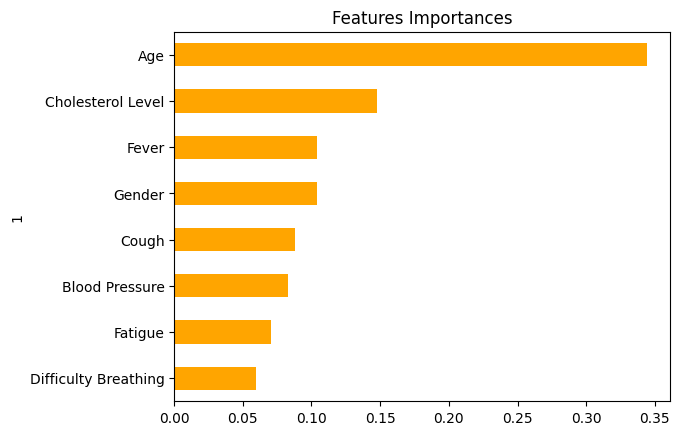

In [ ]:
feature_importance = model.feature_importances_
sorted(zip(model.feature_importances_, X.columns), reverse=True)


importances_df = pd.DataFrame(sorted(zip(model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='orange', title= 'Features Importances', legend=False)

In [ ]:
# @anvil.server.callable
# def predict_disease(fever_selection,cough_selection,fatigue_selection,breathing_selection,cholesterol_selection,blood_selection,gender_selection,age):
#   classification = model.predict([["Fever", "Cough", "Fatigue", "Difficulty Breathing","Cholesterol Level","Blood Pressure","Gender","Age"]])
#   return disease_df.target_names[classification][0]

In [ ]:
anvil.server.wait_forever()